In [3]:

import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load dataset using Dask (for large data handling)
df = dd.read_csv("5000000 HRA Records.csv")  # Change filename as needed

# Display first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,53,Yes,Non-Travel,862,Support,46,5,Marketing,1,1,...,3,80,3,29,2,4,28,4,3,8
1,59,No,Travel_Frequently,1269,Sales,37,5,Human Resources,1,2,...,4,80,3,19,2,1,15,10,15,15
2,43,No,Non-Travel,383,Software,32,2,Technical Degree,1,3,...,3,80,3,29,3,4,22,17,16,7
3,51,No,Travel_Rarely,1353,Research & Development,45,3,Marketing,1,4,...,1,80,2,3,4,4,2,2,2,1
4,54,Yes,Non-Travel,216,Software,14,1,Marketing,1,5,...,1,80,2,36,1,3,30,23,21,14


In [6]:
df.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 35 entries, Age to YearsWithCurrManager
dtypes: int64(26), string(9)

In [7]:
# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum().compute()
print("Missing Values:\n", missing_values)

# Drop columns with too many missing values
df = df.dropna()

# Convert categorical columns to category type for efficiency
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert 'Attrition' to numeric for modeling
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

C:\Users\Nacer\AppData\Roaming\Python\Python313\site-packages\dask\dataframe\dask_expr\_collection.py:4208: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Attrition', 'float64'))

  warnings.warn(meta_warning(meta))


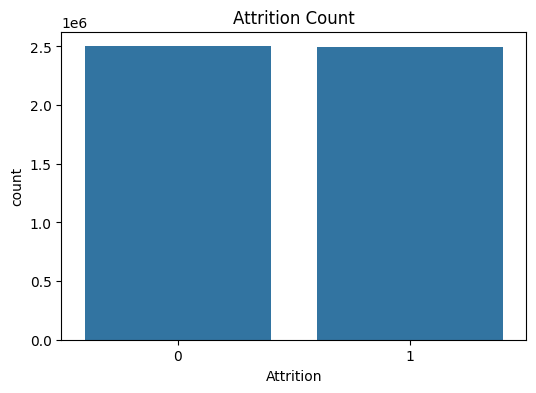

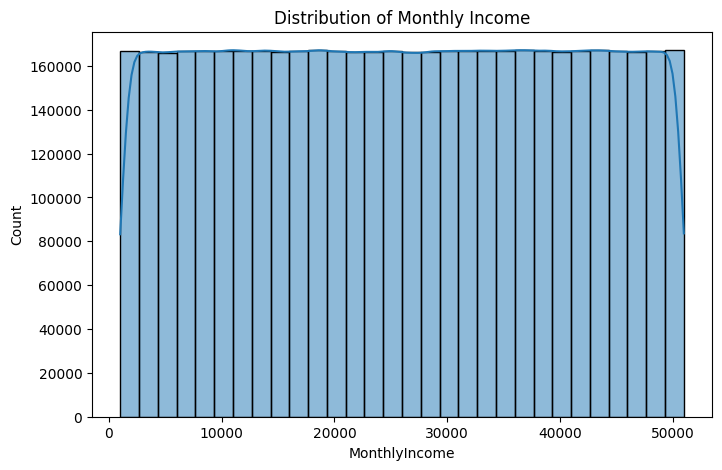

In [ ]:
# Plot Attrition Rate
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df.compute())
plt.title("Attrition Count")
plt.show()

# Distribution of Monthly Income
plt.figure(figsize=(8,5))
sns.histplot(df.compute()['MonthlyIncome'], bins=30, kde=True)
plt.title("Distribution of Monthly Income")
plt.show()


In [9]:
# Drop non-helpful columns
cols_to_drop = ['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount', 
                'DailyRate', 'HourlyRate', 'MonthlyRate']

df = df.drop(columns=cols_to_drop)


In [10]:
df.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 28 entries, Age to YearsWithCurrManager
dtypes: category(7), float64(1), int64(20)

In [13]:
# Select Features & Target
features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']
X = df[features]
y = df['Attrition']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X.compute(), y.compute(), test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.507808
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.51    499323
           1       0.51      0.50      0.50    500677

    accuracy                           0.51   1000000
   macro avg       0.51      0.51      0.51   1000000
weighted avg       0.51      0.51      0.51   1000000



In [15]:
# Convert to pandas and save as a single CSV
df.compute().to_csv("HR_Analytics_Cleaned.csv", index=False)